In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("datos_tec.csv")

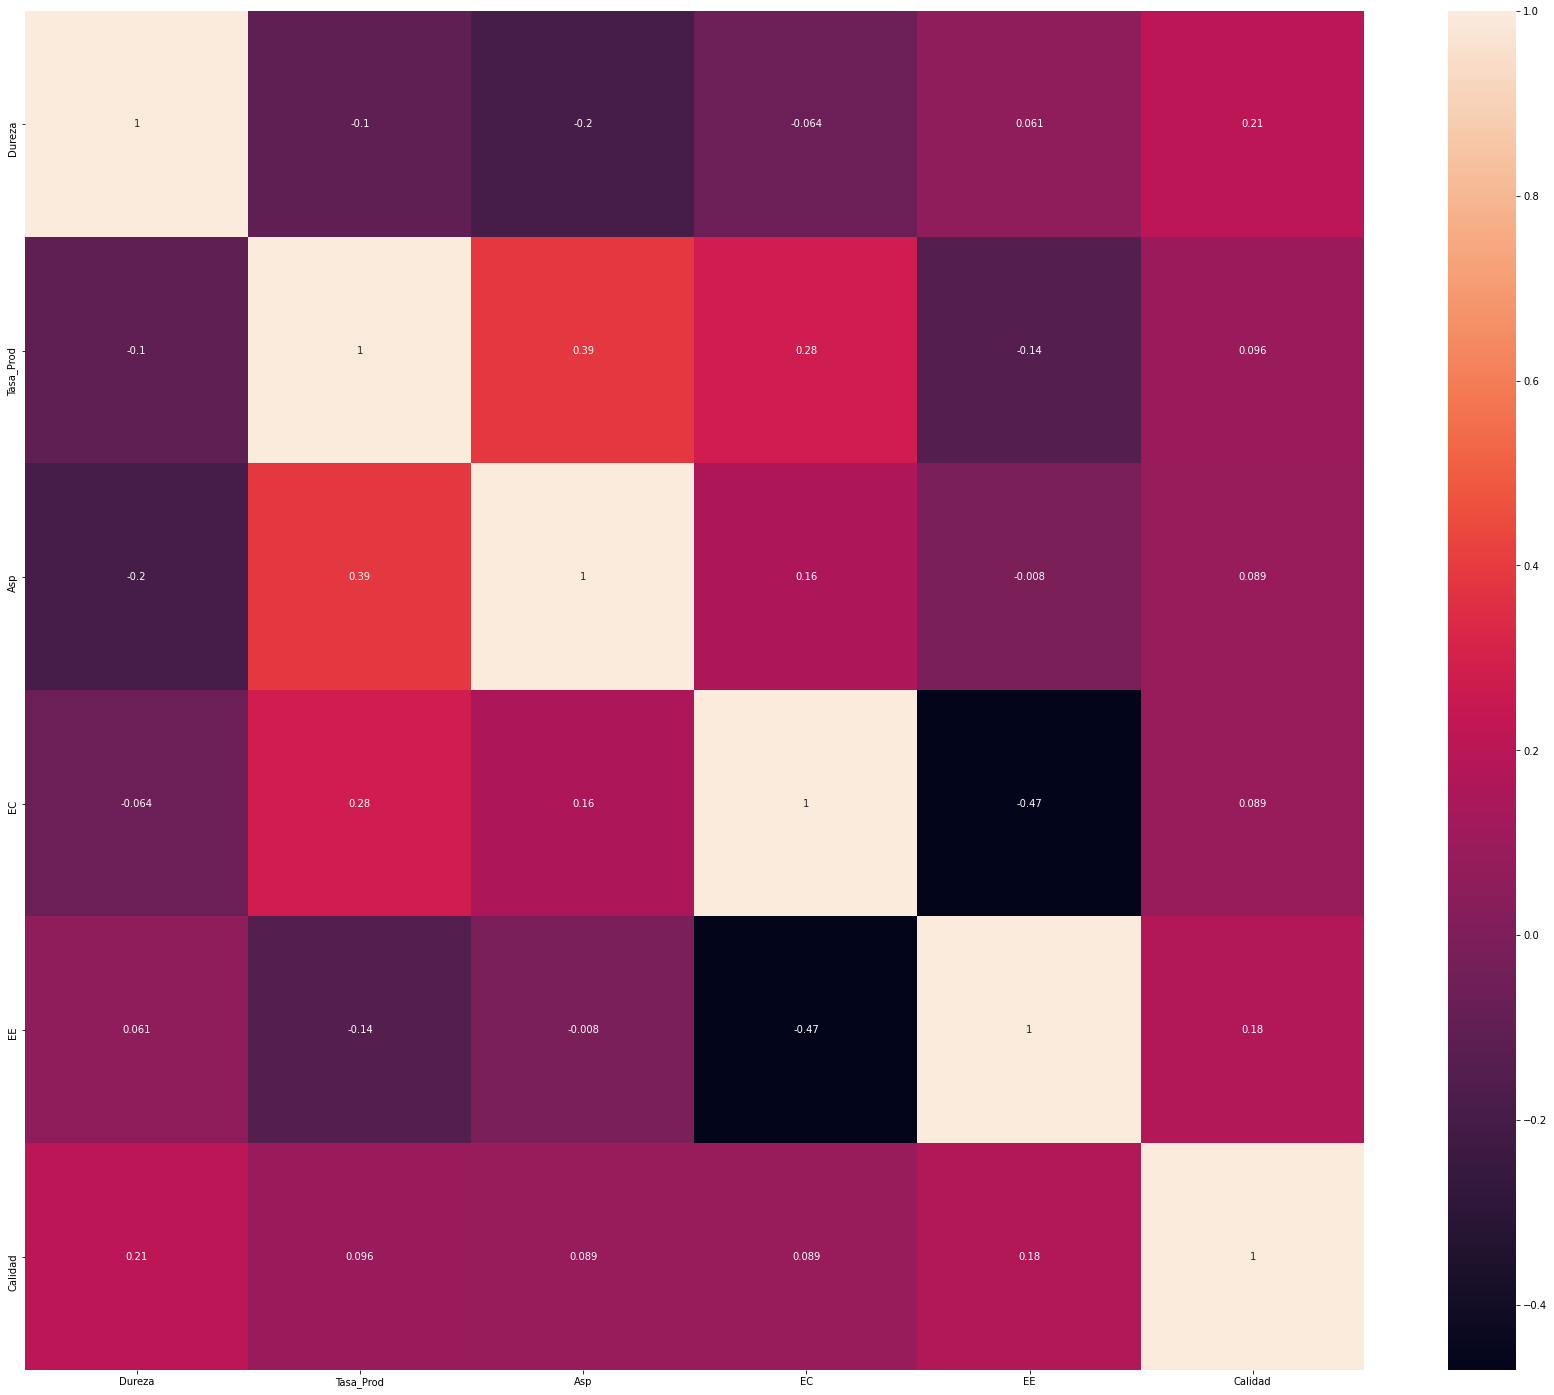

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr('spearman'), annot=True)

In [ ]:
df.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,9391.000000,9392.000000,9391.000000,9392.000000,9392.000000,9392.000000
mean,104.028644,391.005111,3.152306,19.362425,19.059135,0.089891
std,2.049060,43.352777,0.375251,6.698657,8.035162,0.048819
min,80.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,103.000000,383.000000,3.040000,15.900000,14.200000,0.061000
50%,104.000000,398.000000,3.260000,19.200000,20.000000,0.081000
75%,105.000000,408.000000,3.380000,23.500000,25.200000,0.107000
max,112.000000,480.000000,3.520000,40.400000,35.300000,1.000000


### NaN Handling

In [ ]:
pd.isna(df).sum()

TIME         0
Dureza       1
Tasa_Prod    0
Asp          1
EC           0
EE           0
Calidad      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.drop(["TIME", "Asp"], axis=1)

In [ ]:
pd.isna(df).sum()

Dureza       0
Tasa_Prod    0
EC           0
EE           0
Calidad      0
dtype: int64

### Outliers

In [ ]:
def getCBoxPlots(df, number):
  for i in df.columns:
    bp = sns.boxplot(df[i])
    bp.get_figure().savefig(f"{i}{number}.png")
    bp.get_figure().clf()

In [ ]:
getCBoxPlots(df, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 432x288 with 0 Axes>

In [ ]:
df.shape[0]

9390

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df["ET"] = df["EE"] + df["EC"]

In [ ]:
df.describe()

,Dureza,Tasa_Prod,EC,EE,Calidad,ET
count,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000
mean,103.977662,398.140500,20.259944,19.271012,0.083375,39.530956
std,1.772117,18.727145,5.248174,7.714986,0.030894,6.655777
min,100.000000,346.000000,4.600000,0.000000,0.000000,8.500000
25%,103.000000,386.000000,16.600000,14.700000,0.061000,35.500000
50%,104.000000,399.000000,19.500000,20.100000,0.080000,40.300000
75%,105.000000,410.000000,23.700000,25.100000,0.103000,44.400000
max,108.000000,445.000000,34.900000,34.900000,0.175000,56.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7879 entries, 0 to 9391
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dureza     7879 non-null   float64
 1   Tasa_Prod  7879 non-null   int64  
 2   EC         7879 non-null   float64
 3   EE         7879 non-null   float64
 4   Calidad    7879 non-null   float64
 5   ET         7879 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 430.9 KB


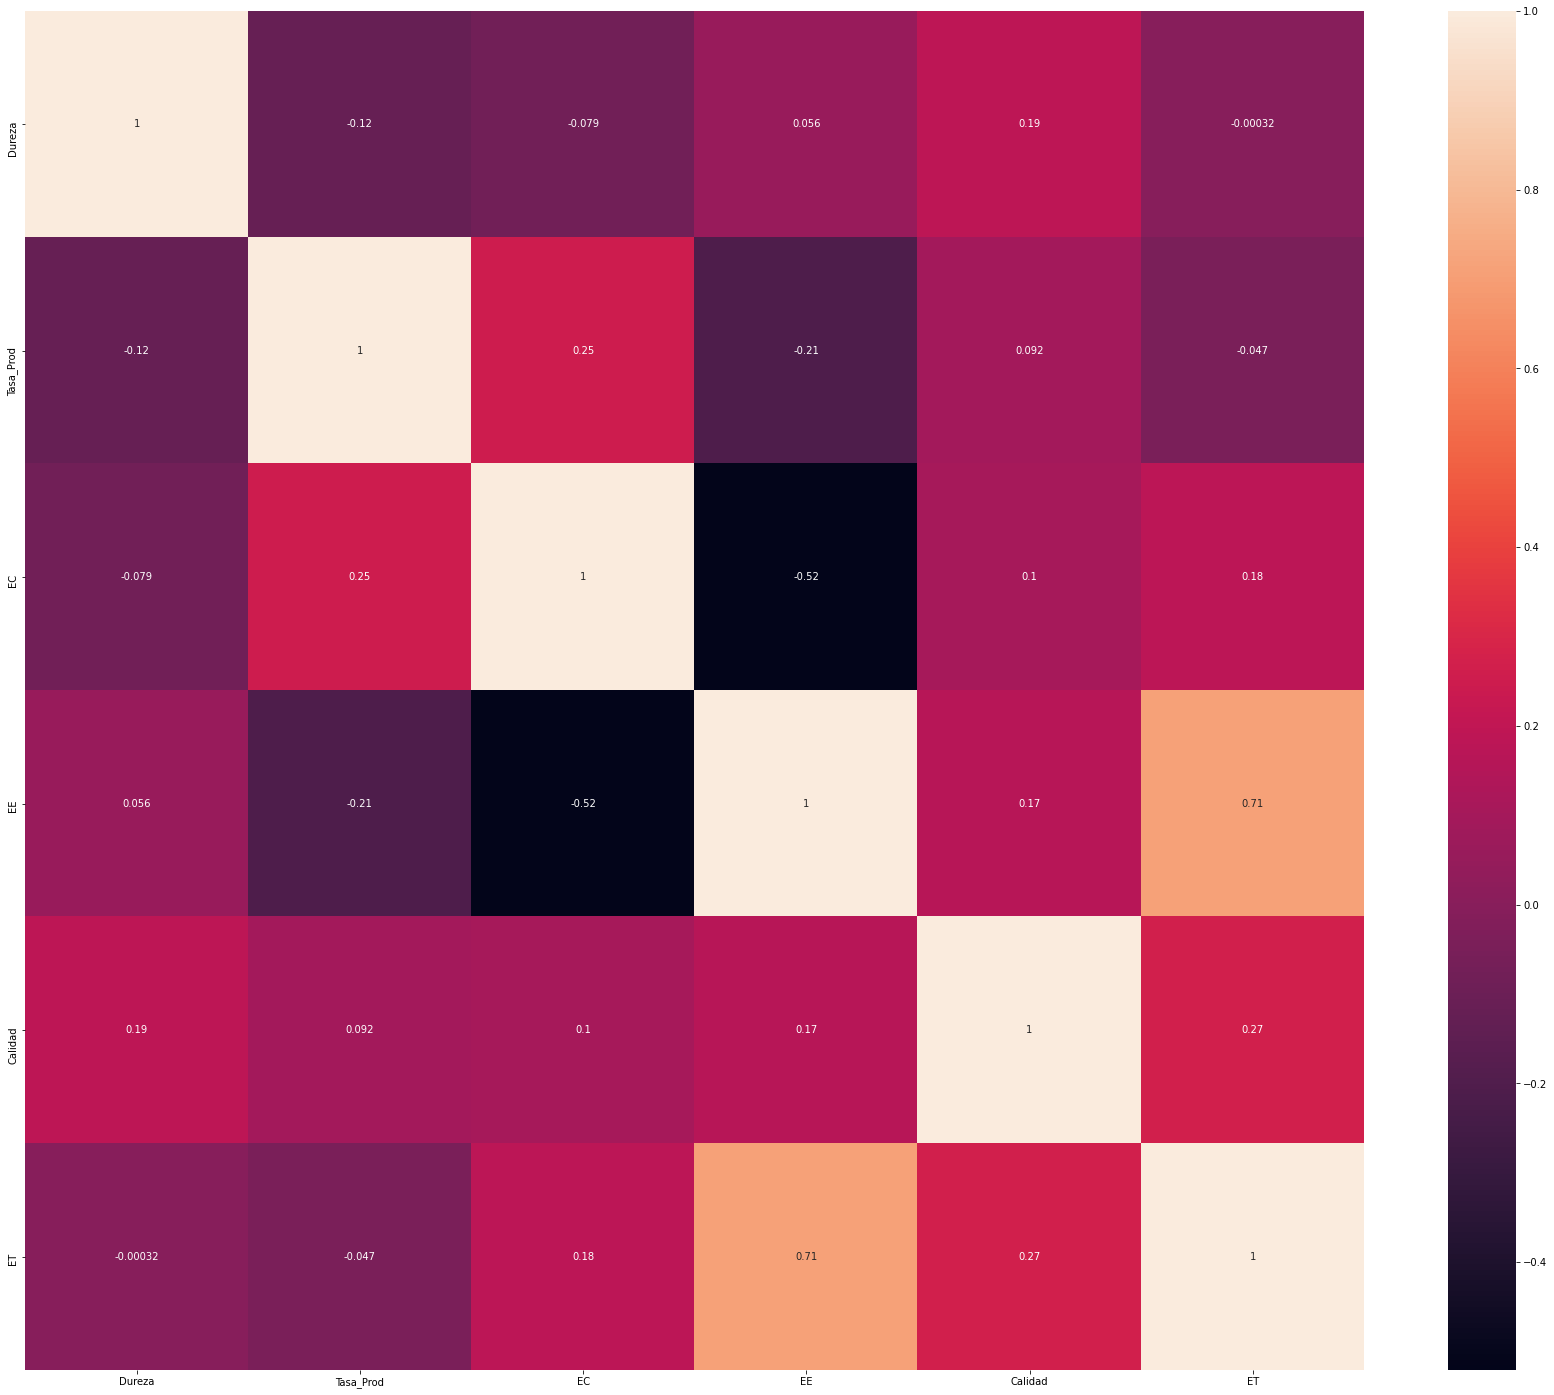

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr('spearman'), annot=True)

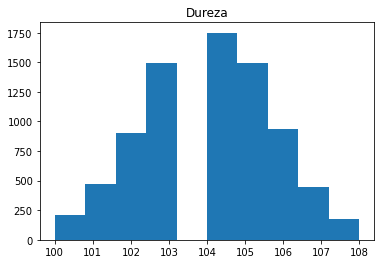

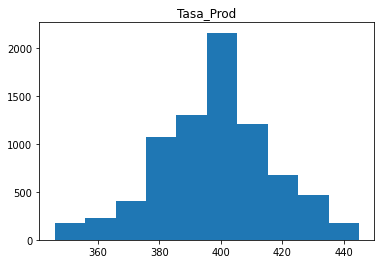

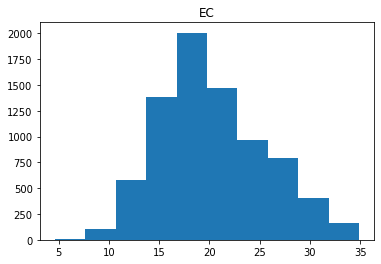

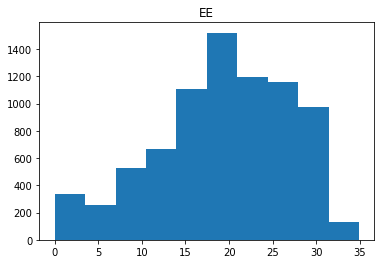

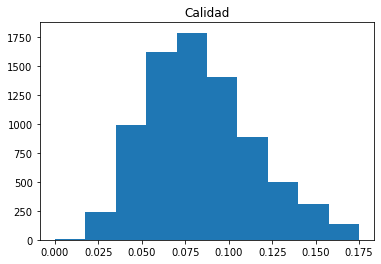

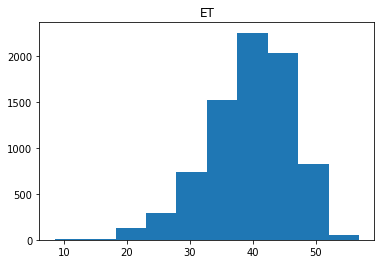

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in df.columns:
  plt.hist(df[i])
  plt.title(i)
  plt.show()
  plt.clf()

In [ ]:
getCBoxPlots(df, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 432x288 with 0 Axes>

In [ ]:
def printTableOfScatters(df):
  fig, axs = plt.subplots(len(df.columns), len(df.columns), figsize = (25, 25))
  fig.suptitle('Análisis')
  c = -1
  p = -1
  for i in df.columns:
    c += 1
    for k in df.columns:
      p += 1
      axs[p, c].scatter(df[k], df[i])
      axs[p, c].set_xlabel(k)
      axs[p, c].set_ylabel(i)
    p = -1

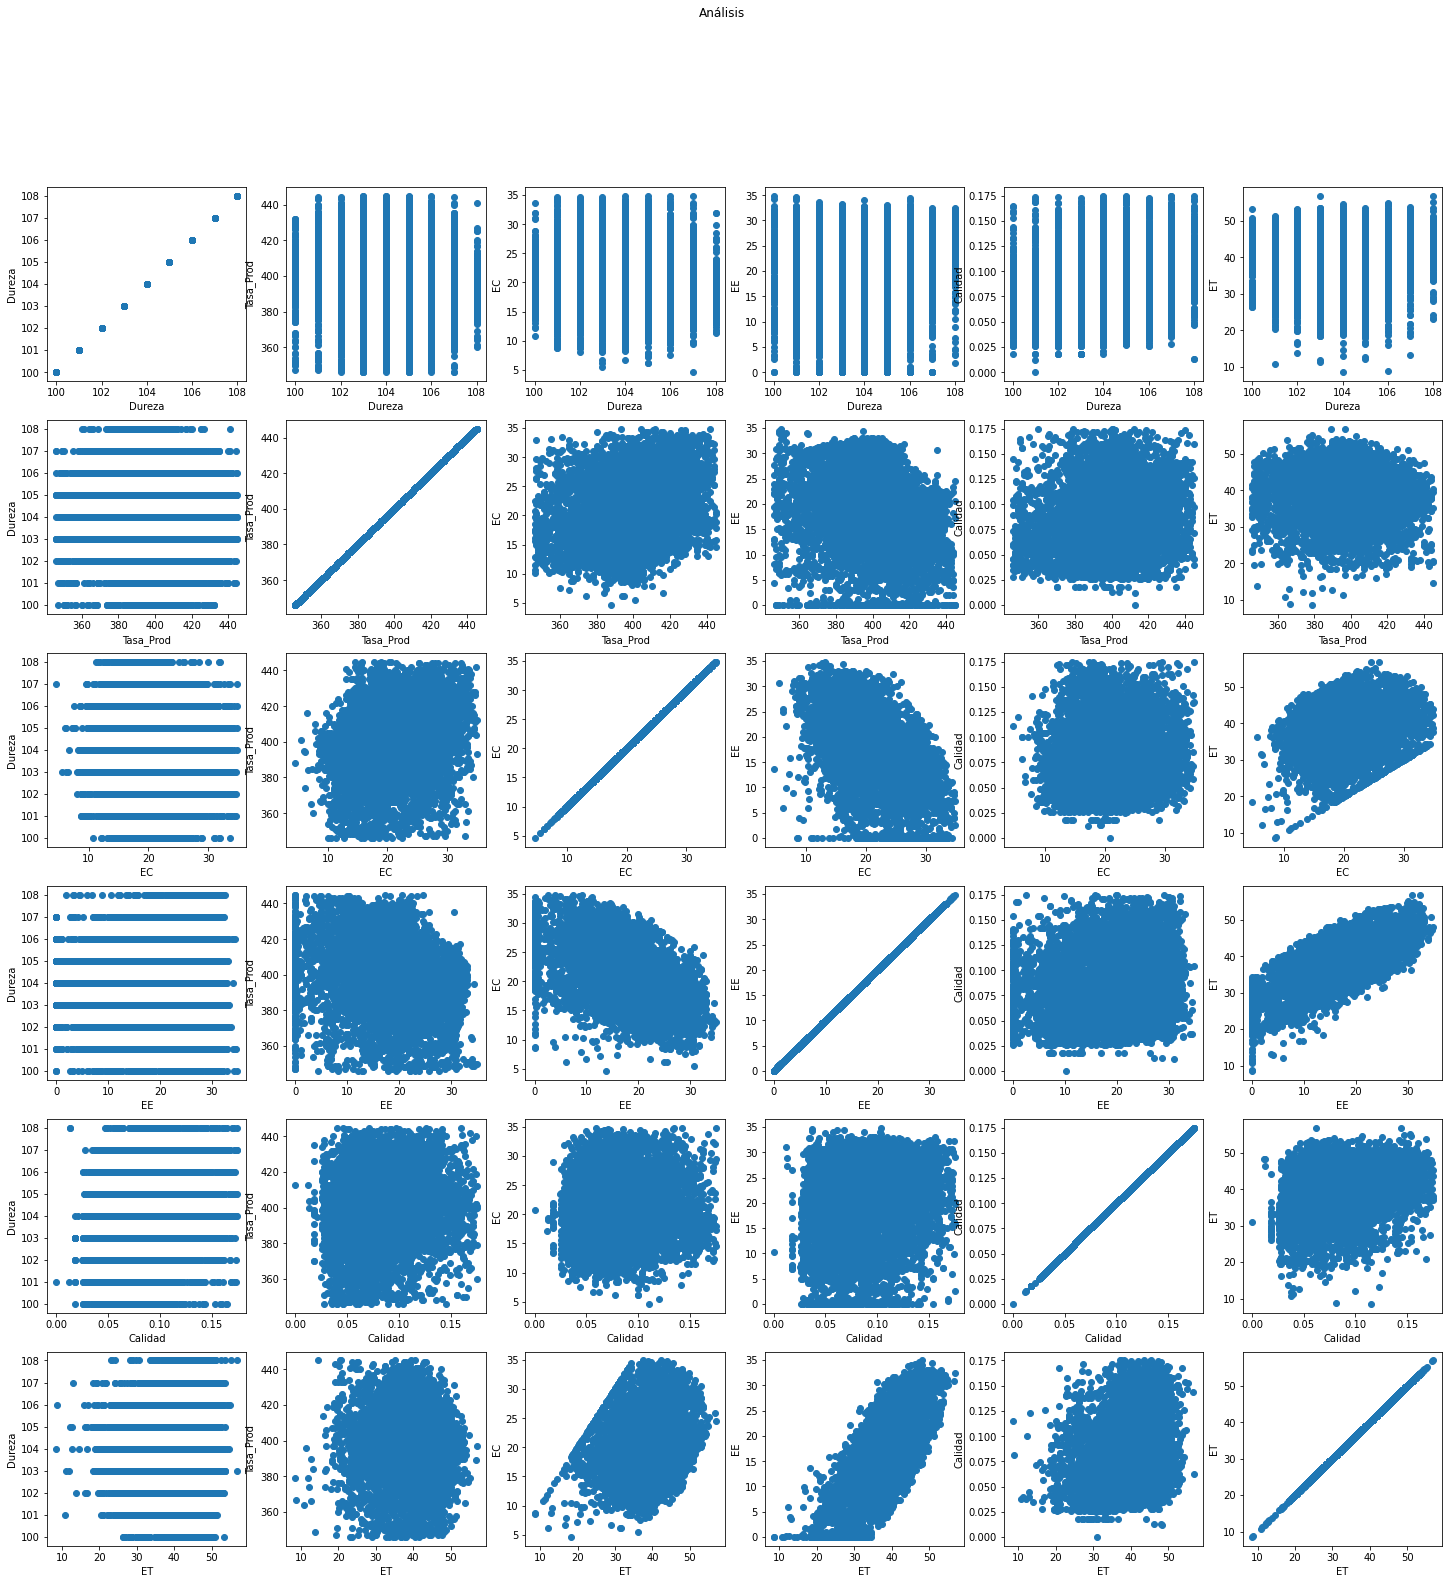

In [ ]:
printTableOfScatters(df)

In [ ]:
def removeOutliers(columns, df):
  for i in columns:
    q1_q = df[i].quantile(0.25)
    q3_q = df[i].quantile(0.75)
    iqr_q = q3_q - q1_q
    df[(df[i] >= q1_q - 1.5*iqr_q) & (df[i] <= q3_q + 1.5*iqr_q)]
  return df

In [ ]:
df = removeOutliers(["Tasa_Prod", "Calidad"], df)

In [ ]:
df.shape[0]

7879

In [ ]:
getCBoxPlots(df, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 432x288 with 0 Axes>

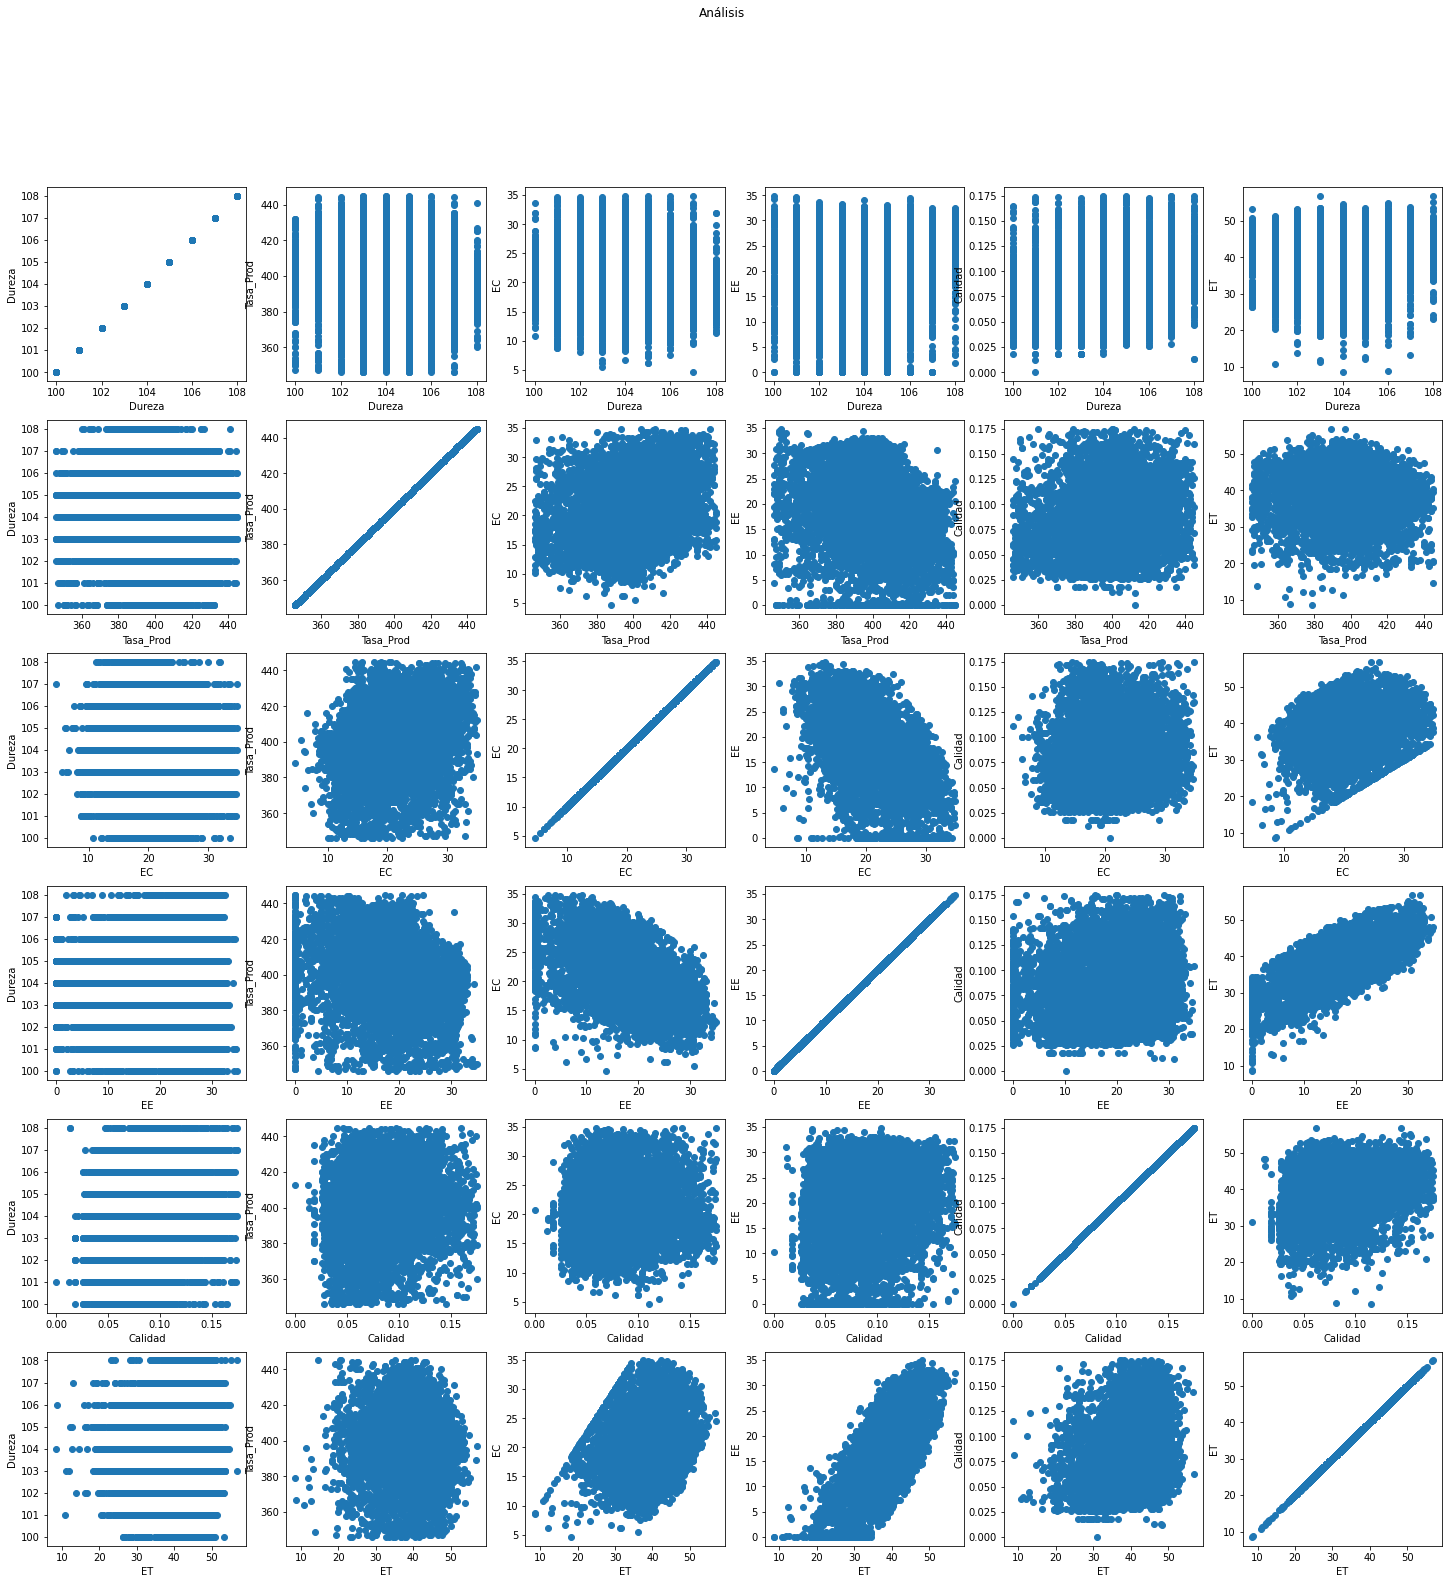

In [ ]:
printTableOfScatters(df)

In [ ]:
df = removeOutliers(["Tasa_Prod", "Calidad"], df)

In [ ]:
getCBoxPlots(df, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 432x288 with 0 Axes>

In [ ]:
df.shape[0]

7879

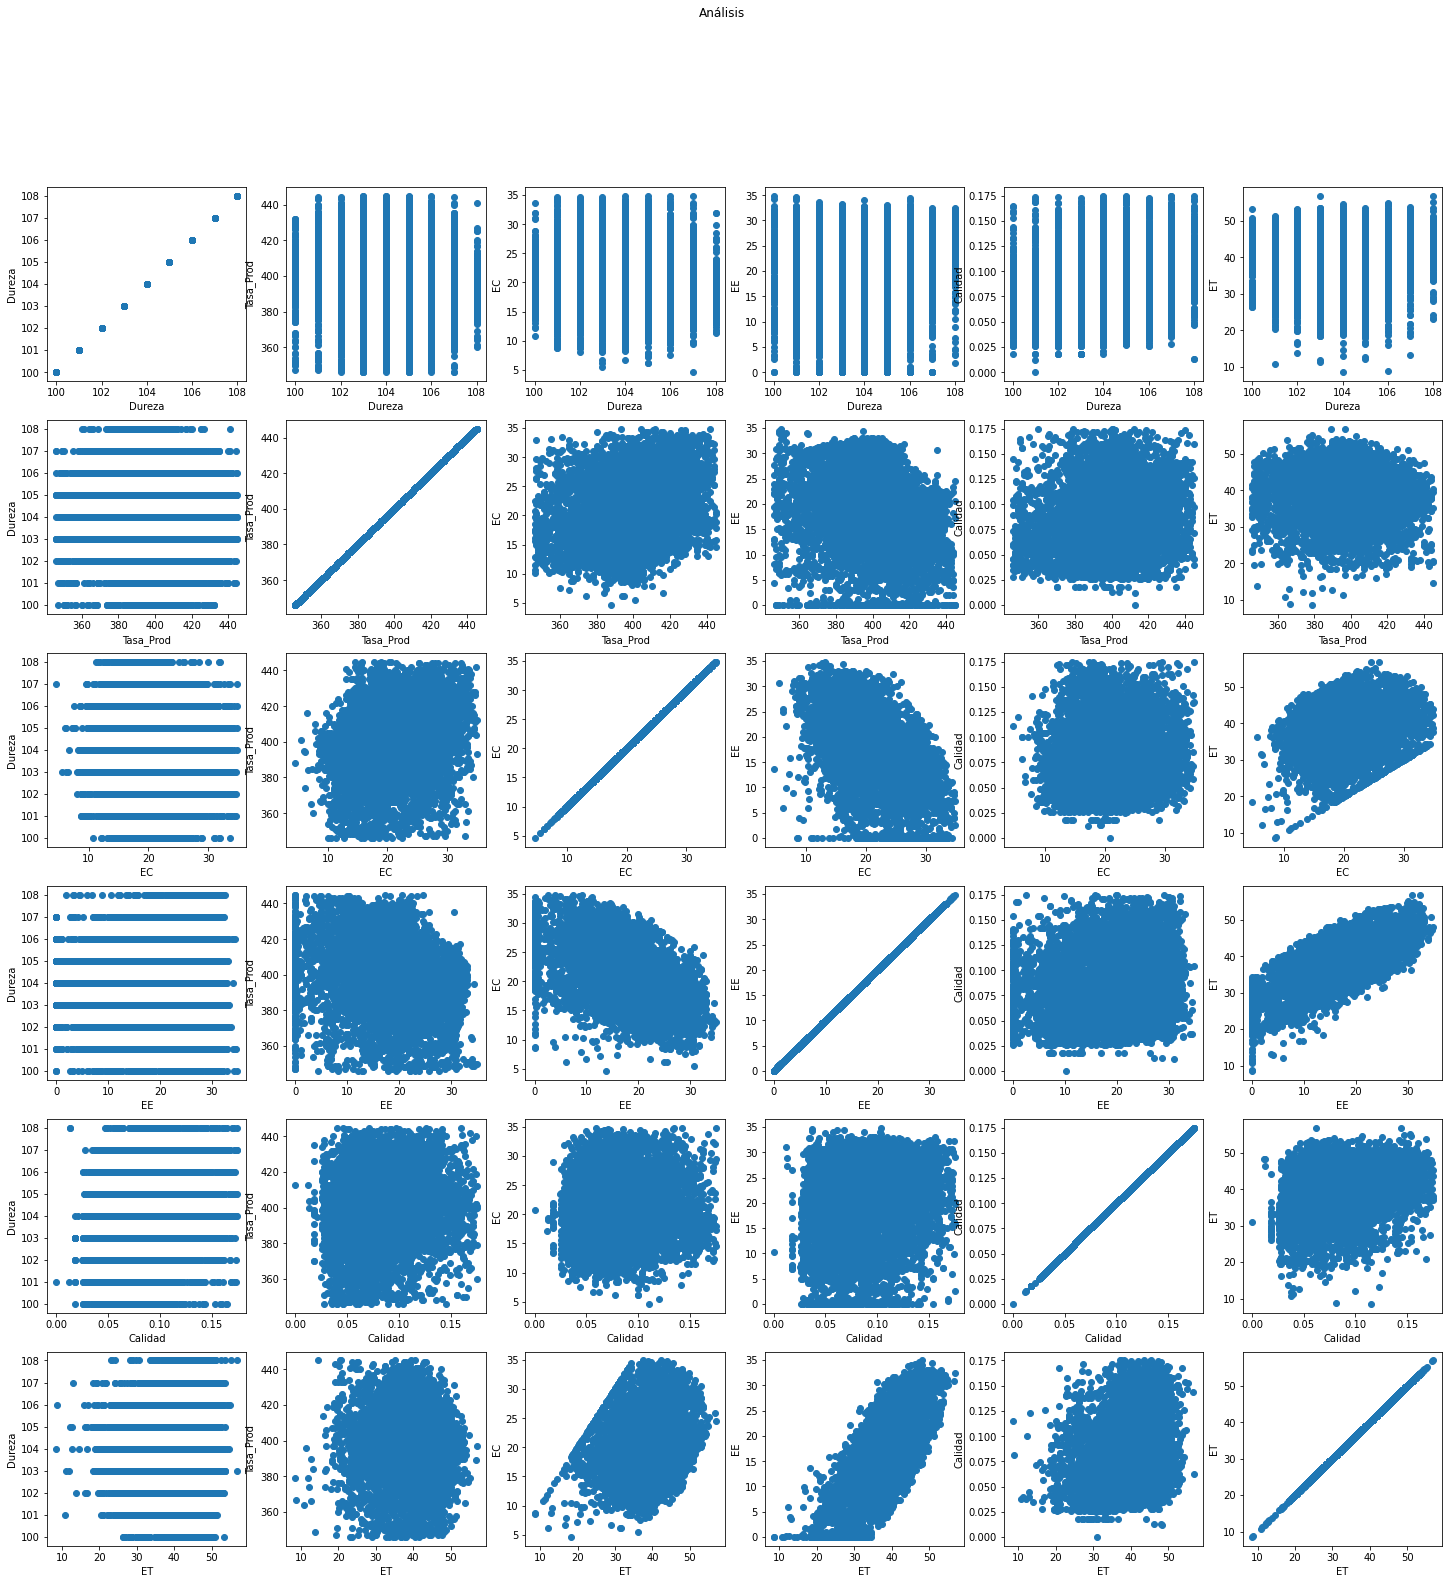

In [ ]:
printTableOfScatters(df)

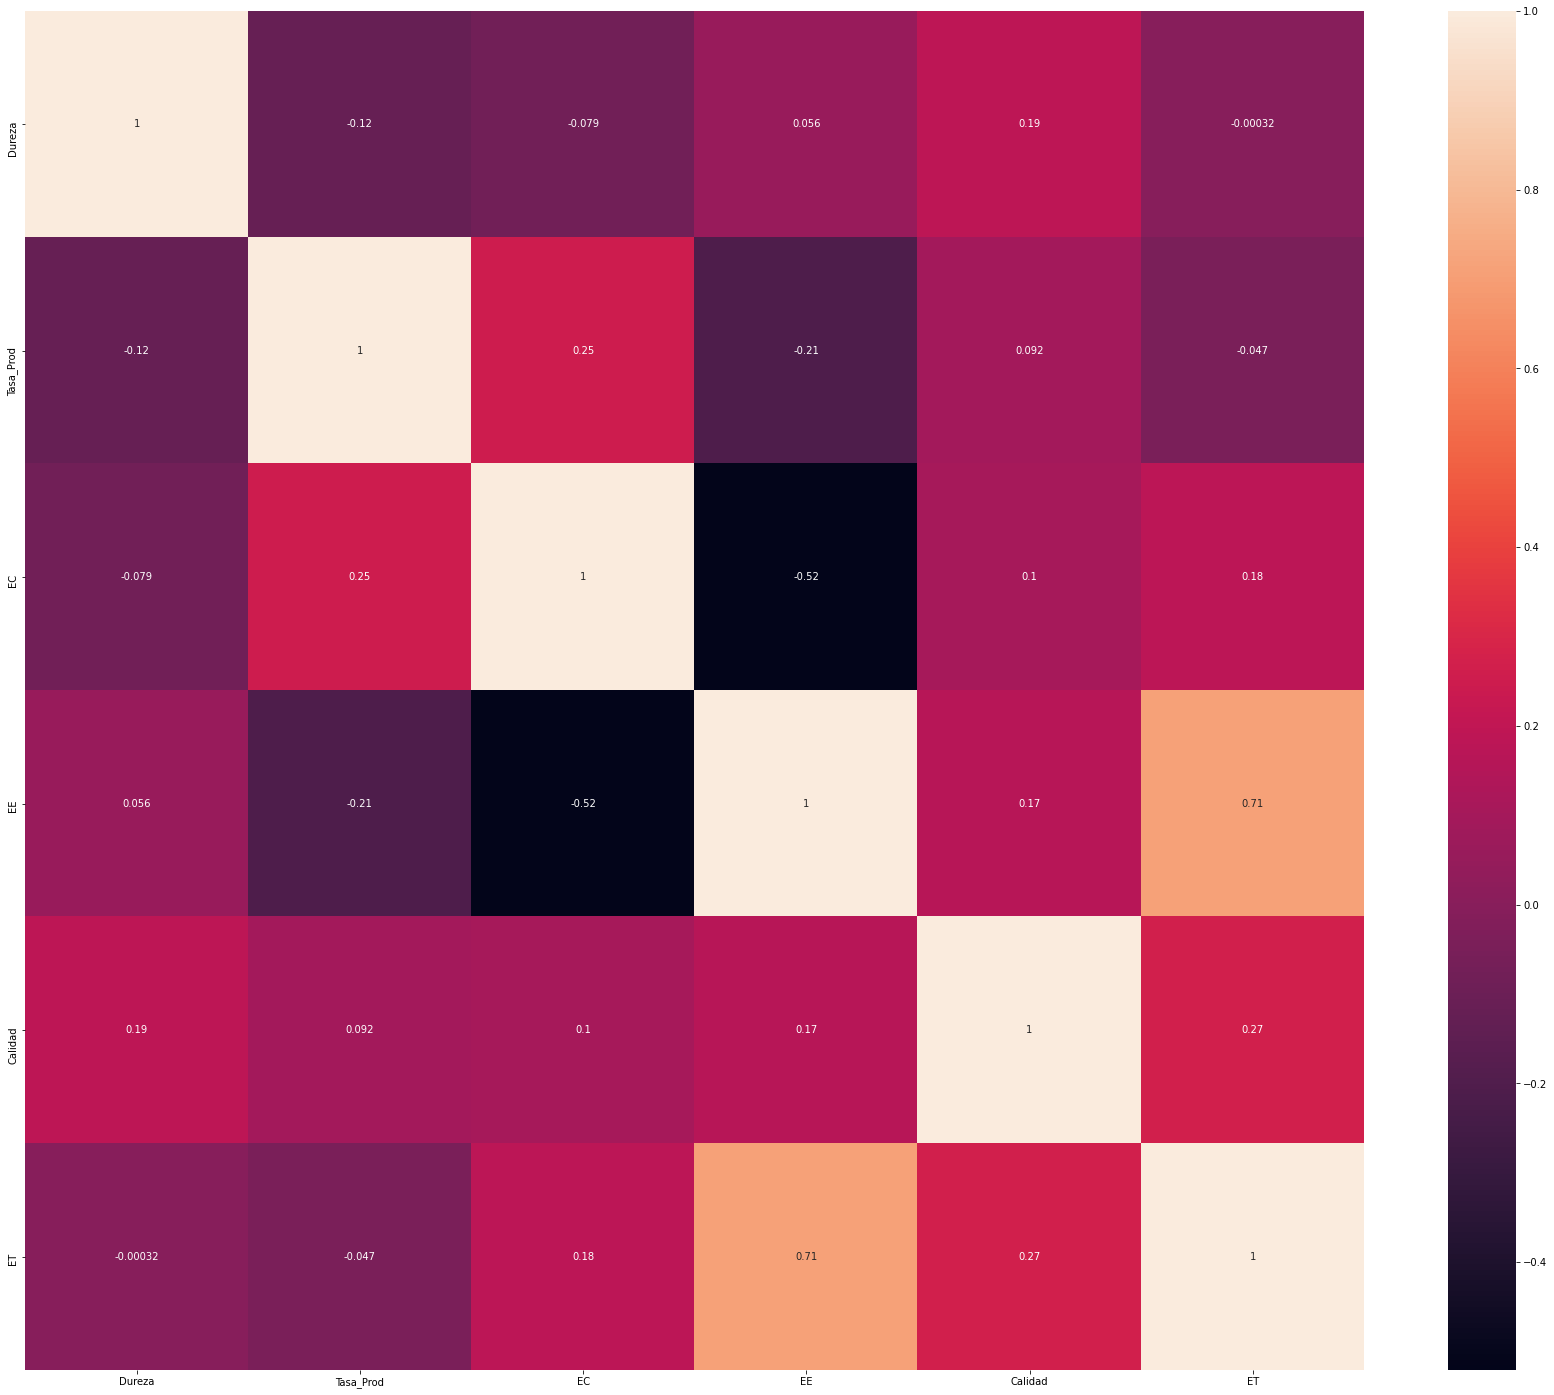

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr('spearman'), annot=True)

In [ ]:
df.describe()

,Dureza,Tasa_Prod,EC,EE,Calidad,ET
count,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000
mean,103.977662,398.140500,20.259944,19.271012,0.083375,39.530956
std,1.772117,18.727145,5.248174,7.714986,0.030894,6.655777
min,100.000000,346.000000,4.600000,0.000000,0.000000,8.500000
25%,103.000000,386.000000,16.600000,14.700000,0.061000,35.500000
50%,104.000000,399.000000,19.500000,20.100000,0.080000,40.300000
75%,105.000000,410.000000,23.700000,25.100000,0.103000,44.400000
max,108.000000,445.000000,34.900000,34.900000,0.175000,56.900000


In [ ]:
from sklearn import preprocessing
sScaler = preprocessing.StandardScaler()

In [ ]:
df = pd.DataFrame(sScaler.fit_transform(df), columns=df.columns)
df

,Dureza,Tasa_Prod,EC,EE,Calidad,ET
0,-2.244724,-1.609557,-0.983251,1.351869,-0.983256,0.791700
1,-2.244724,1.487748,1.265293,-2.498026,0.797115,-1.897864
2,-1.116059,-0.968736,-0.525920,0.950028,-1.047997,0.686522
3,0.576939,-0.274512,1.112849,-2.498026,1.768227,-2.018068
4,1.705604,0.259506,1.665458,-2.109147,1.476893,-1.131563
...,...,...,...,...,...,...
7874,0.012606,0.793524,-0.640253,0.716701,0.797115,0.325910
7875,-1.680392,0.526515,0.274409,-0.696223,-0.724293,-0.590646
7876,-2.244724,-2.463986,-0.887974,-0.216607,-1.695405,-0.951257
7877,-2.244724,0.045899,-0.621197,0.457449,-0.789034,0.040425


In [ ]:
df.describe()

,Dureza,Tasa_Prod,EC,EE,Calidad,ET
count,7.879000e+03,7.879000e+03,7.879000e+03,7.879000e+03,7.879000e+03,7.879000e+03
mean,1.287599e-15,-1.902893e-15,-1.262405e-16,9.104509e-16,1.929891e-16,-1.209564e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.244724e+00,-2.784397e+00,-2.984074e+00,-2.498026e+00,-2.698886e+00,-4.662555e+00
25%,-5.517266e-01,-6.483247e-01,-6.974191e-01,-5.925223e-01,-7.242930e-01,-6.056710e-01
50%,1.260598e-02,4.589885e-02,-1.448108e-01,1.074585e-01,-1.092557e-01,1.155527e-01
75%,5.769385e-01,6.333188e-01,6.555184e-01,7.555889e-01,6.352631e-01,7.315980e-01
max,2.269936e+00,2.502382e+00,2.789730e+00,2.025925e+00,2.965931e+00,2.609785e+00


In [ ]:
y_EC = df["EC"]
y_EE = df["EE"]
y_ET = df["ET"]
X_EC = df.drop(["EC", "ET"], axis=1)
X_EE = df.drop(["EE", "ET", "EC"], axis=1)
X = df.drop(["ET", "EC", "EE"], axis=1)

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = df["Tasa_Prod"], df["Calidad"], df["Dureza"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

Text(0, 0.5, 'Distancia Euclideana')

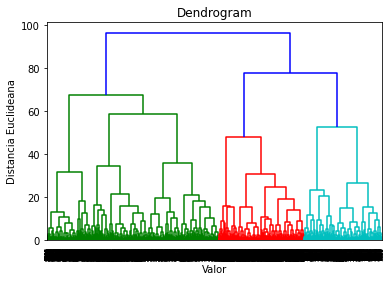

In [ ]:
import scipy.cluster.hierarchy as sch
x_temp = df.drop("ET", axis=1)
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Valor')
plt.ylabel('Distancia Euclideana')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage="ward")
y_hc = hc.fit_predict(X)

In [ ]:
x_temp.columns

Index(['Dureza', 'Tasa_Prod', 'EC', 'EE', 'Calidad'], dtype='object')

In [ ]:
# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = X.iloc[y_hc == 1, 1], X.iloc[y_hc == 1, 2], X.iloc[y_hc == 1, 0]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

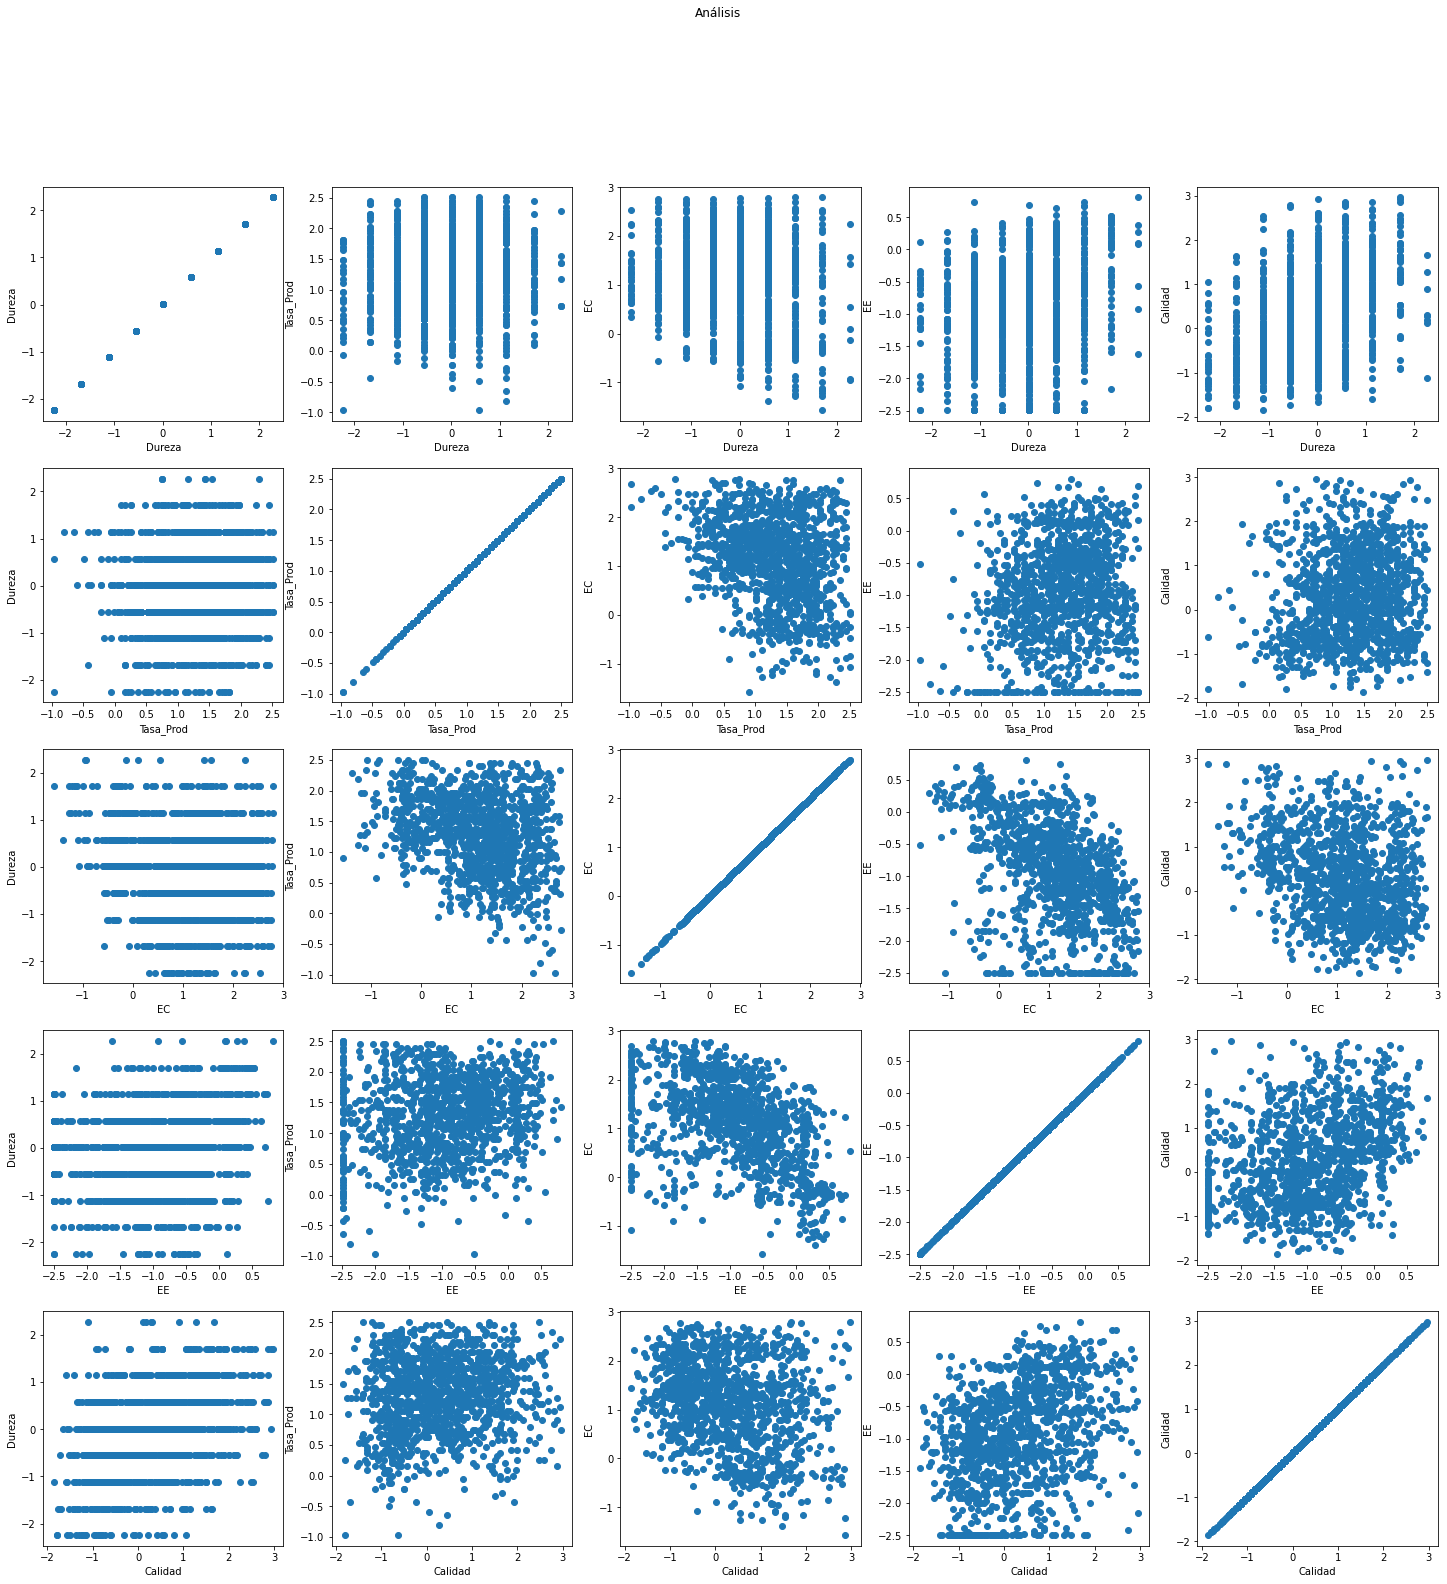

In [ ]:
printTableOfScatters(x_temp.iloc[y_hc == 0])

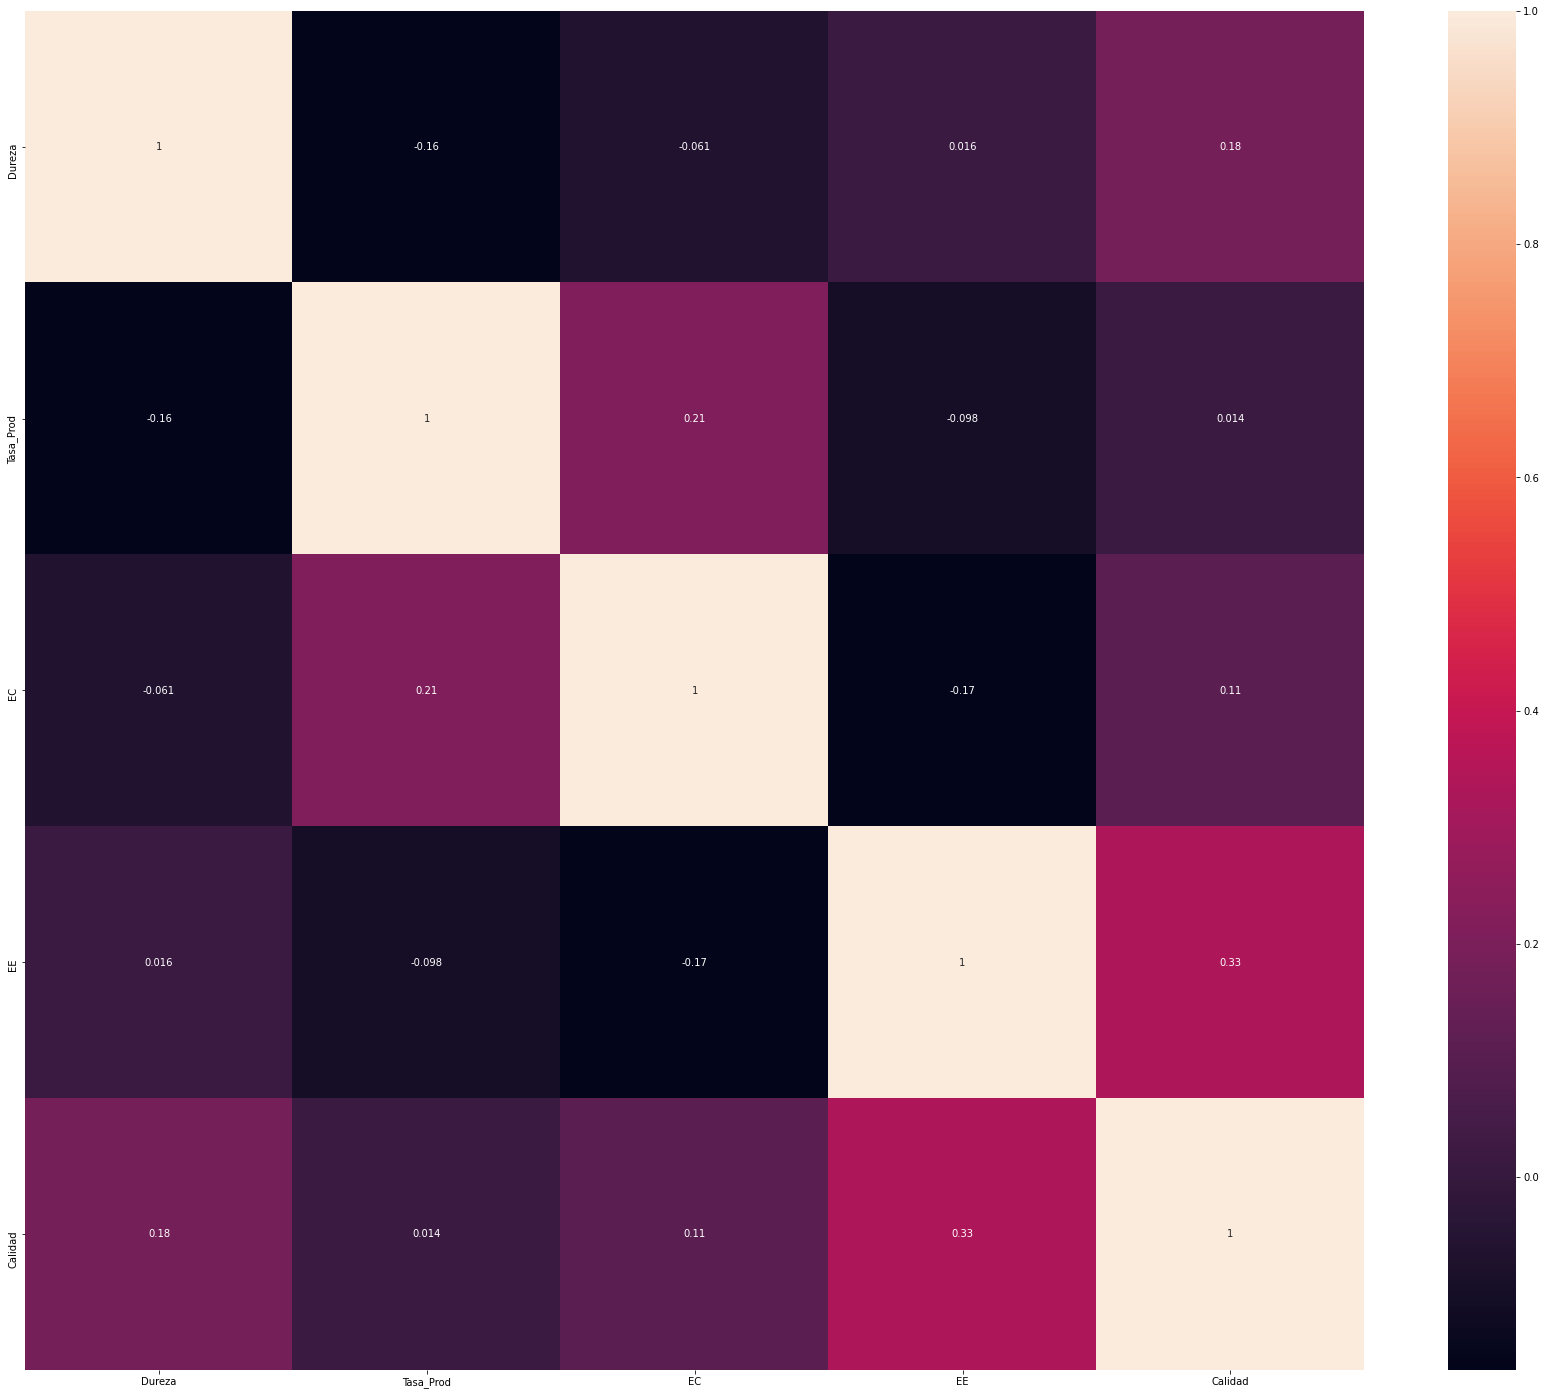

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(x_temp.iloc[y_hc == 0].corr('spearman'), annot=True)

In [ ]:
df.head()

,Dureza,Tasa_Prod,EC,EE,Calidad,ET
0,-2.244724,-1.609557,-0.983251,1.351869,-0.983256,0.791700
1,-2.244724,1.487748,1.265293,-2.498026,0.797115,-1.897864
2,-1.116059,-0.968736,-0.525920,0.950028,-1.047997,0.686522
3,0.576939,-0.274512,1.112849,-2.498026,1.768227,-2.018068
4,1.705604,0.259506,1.665458,-2.109147,1.476893,-1.131563


In [ ]:
fig, axs = plt.subplots(len(df.columns), len(df.columns), figsize = (25, 25))
fig.suptitle('Análisis')
c = -1
p = -1
for i in df.columns:
  c += 1
  for k in df.columns:
    p += 1
    axs[p, c].scatter(df[k], df[i])
    axs[p, c].set_xlabel(k)
    axs[p, c].set_ylabel(i)
  p = -1

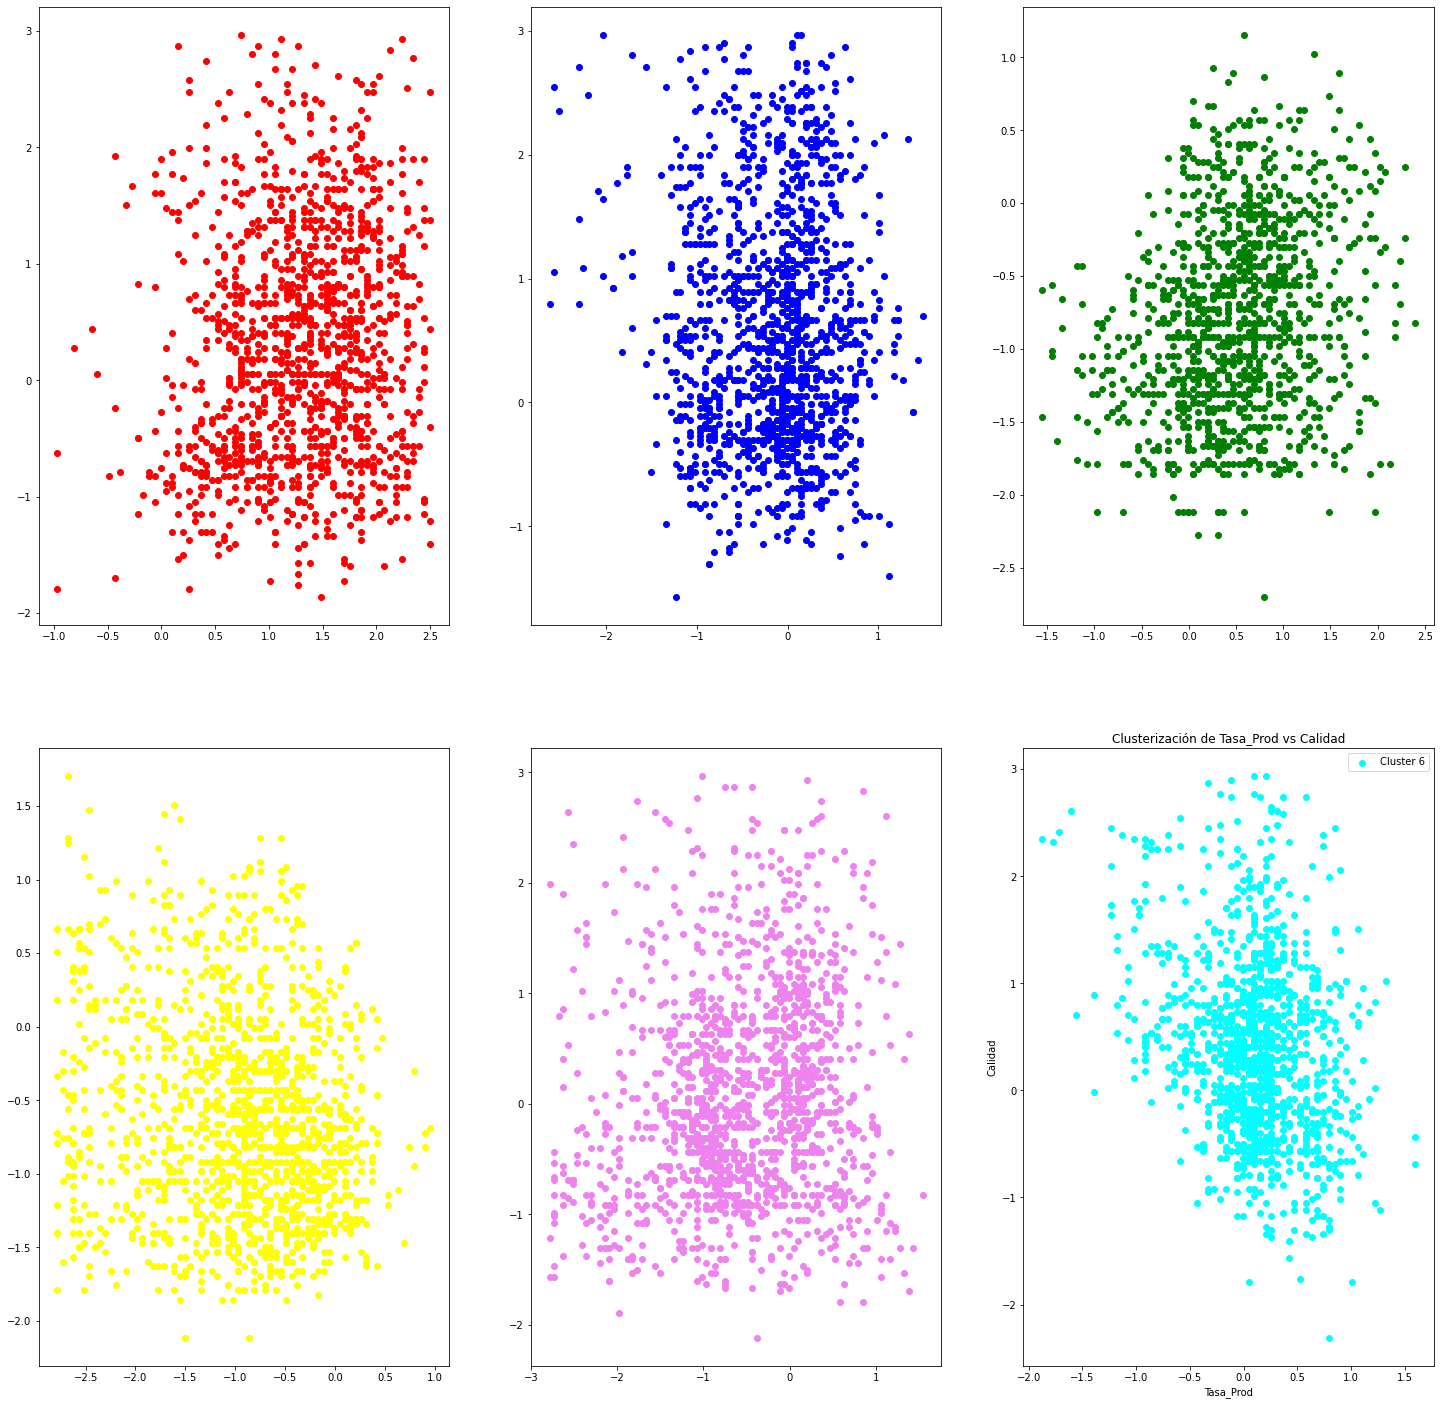

In [ ]:
fig, axs = plt.subplots(2, 3, figsize = (25, 25))
axs[0,0].scatter(X.iloc[y_hc == 0, 1], X.iloc[y_hc == 0, 2], c = "red", label="Cluster 1")
axs[0,1].scatter(X.iloc[y_hc == 1, 1], X.iloc[y_hc == 1, 2], c = "blue", label="Cluster 2")
axs[0,2].scatter(X.iloc[y_hc == 2, 1], X.iloc[y_hc == 2, 2], c = "green", label="Cluster 3")
axs[1,0].scatter(X.iloc[y_hc == 3, 1], X.iloc[y_hc == 3, 2], c = "yellow", label="Cluster 4")
axs[1,1].scatter(X.iloc[y_hc == 4, 1], X.iloc[y_hc == 4, 2], c = "violet", label="Cluster 5")
axs[1,2].scatter(X.iloc[y_hc == 5, 1], X.iloc[y_hc == 5, 2], c = "cyan", label="Cluster 6")
plt.title("Clusterización de Tasa_Prod vs Calidad")
plt.xlabel("Tasa_Prod")
plt.ylabel("Calidad")
plt.legend()
plt.show()

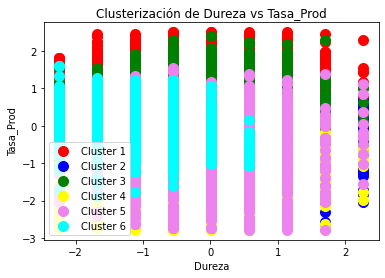

In [ ]:
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = "red", label="Cluster 1")
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = "blue", label="Cluster 2")
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = "green", label="Cluster 3")
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = "yellow", label="Cluster 4")
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = "violet", label="Cluster 5")
plt.scatter(X.iloc[y_hc == 5, 0], X.iloc[y_hc == 5, 1], s = 100, c = "cyan", label="Cluster 6")
plt.title("Clusterización de Dureza vs Tasa_Prod")
plt.ylabel("Tasa_Prod")
plt.xlabel("Dureza")
plt.legend()
plt.show()

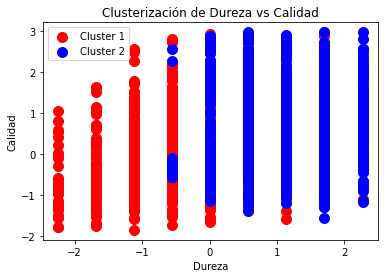

In [ ]:
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 2], s = 100, c = "red", label="Cluster 1")
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 2], s = 100, c = "blue", label="Cluster 2")
plt.title("Clusterización de Dureza vs Calidad")
plt.xlabel("Dureza")
plt.ylabel("Calidad")
plt.legend()
plt.show()

In [ ]:
cluster1 = X.iloc[y_hc == 0]
cluster2 = X.iloc[y_hc == 1]

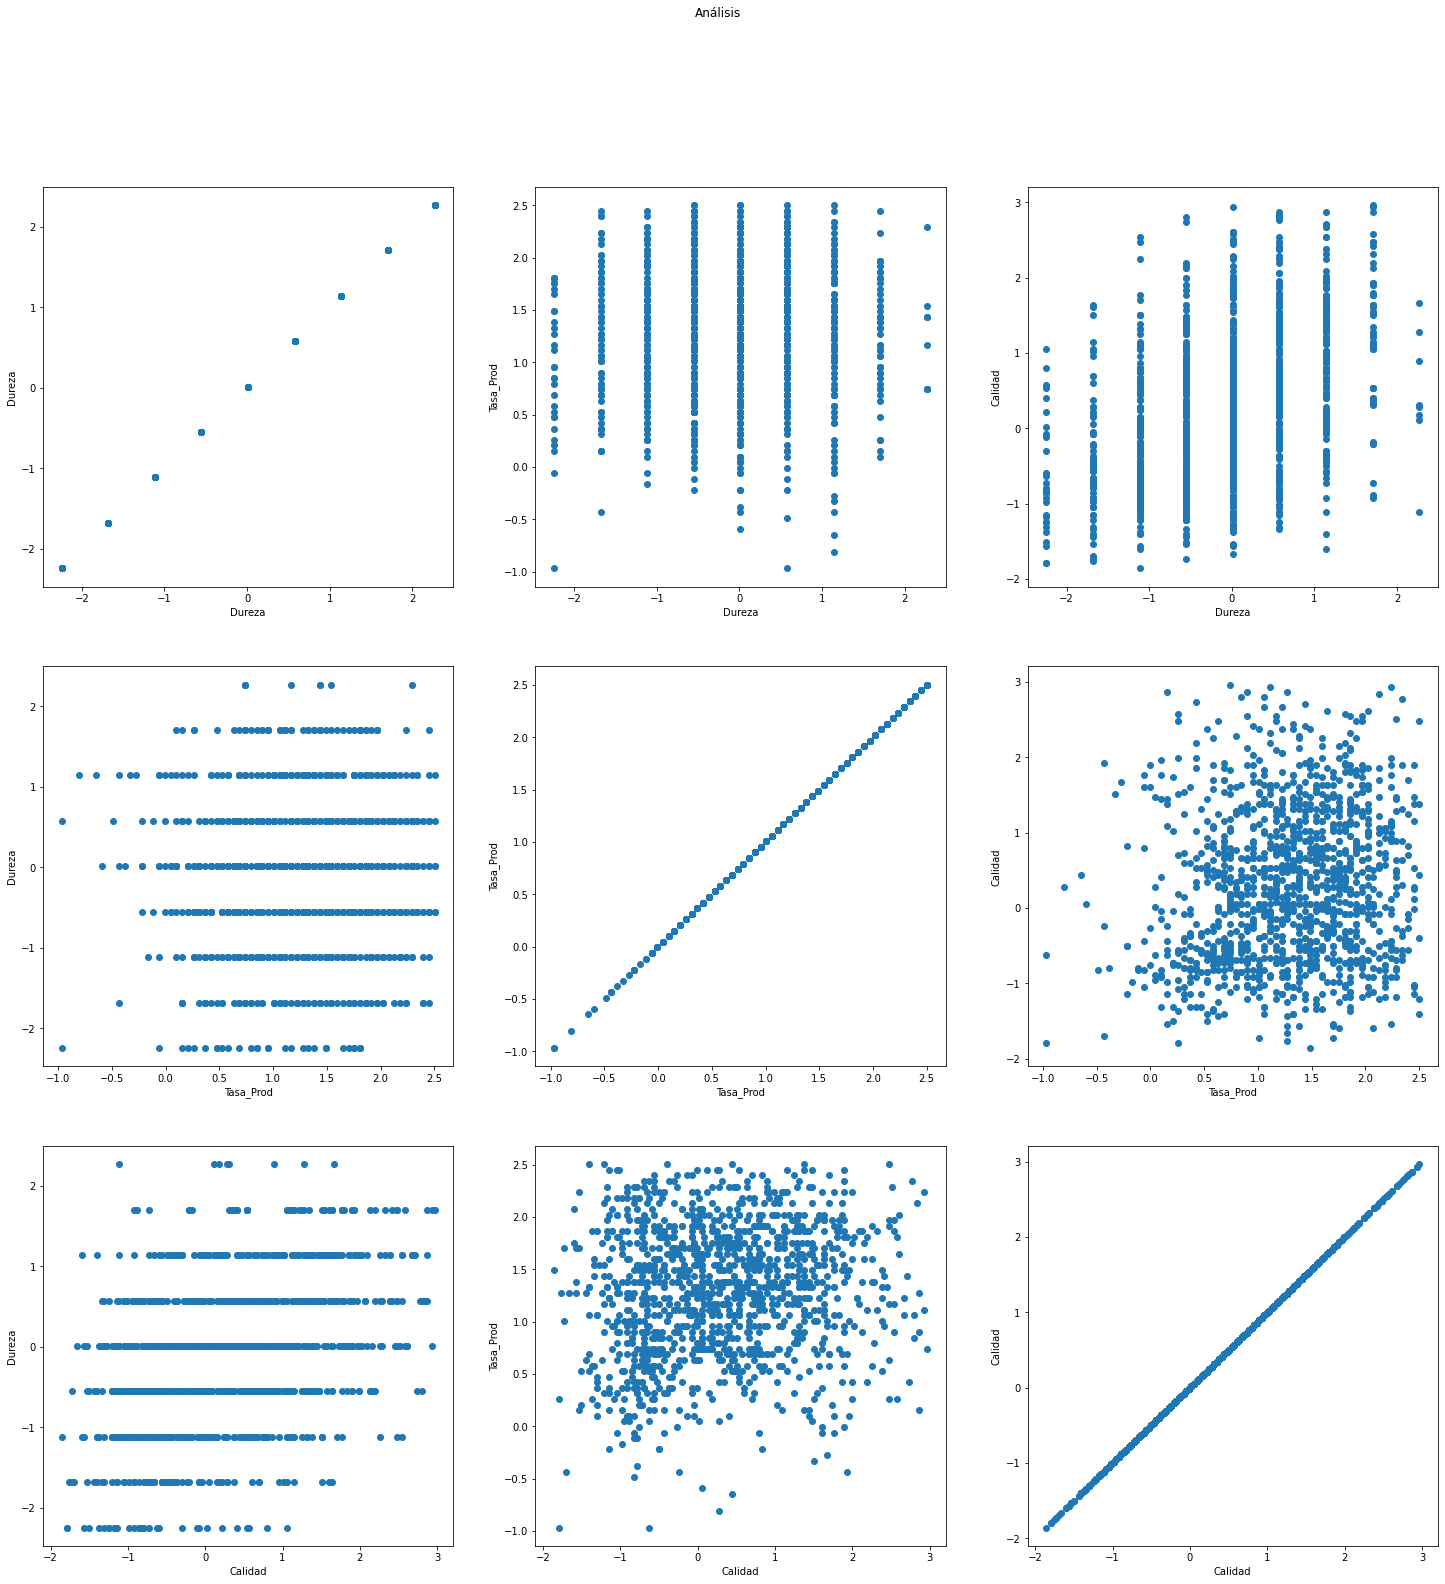

In [ ]:
printTableOfScatters(cluster1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ET, y_ET, test_size=0.3, random_state=42)

NameError: ignored

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel="sigmoid")

In [ ]:
svr.fit(X_train, Y_train)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(svr, X_train, Y_train, cv=folds)
scores

In [ ]:
np.mean(scores)

In [ ]:
getCBoxPlots